In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import pandas as pd

In [24]:
df = pd.read_csv('iris.csv')
feature_names = df.keys()
X = df.iloc[:, 0:4].to_numpy().astype(np.float32)
y = df.iloc[:, 4].to_numpy()
y[ y == 'Iris-setosa' ] = 0
y[ y == 'Iris-versicolor' ] = 1
y[ y == 'Iris-virginica' ] = 2
y = y.astype(np.int64)
N = y.shape[0]

In [26]:
X.shape
y.shape

(150,)

In [15]:
# make X and y torch tensors
X = torch.from_numpy(X)
y = torch.from_numpy(y)

# model = nn.Sequential(
#     nn.Linear(4, 3),
#     nn.Softmax(dim=1)
# ) 

model = nn.Linear(4, 3)

# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

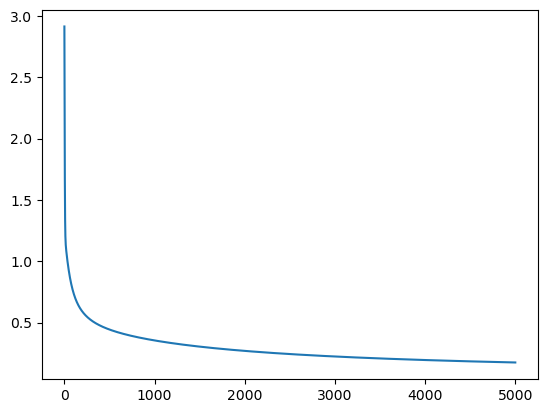

In [16]:
ls = []
for epoch in range(5000):
    a = model(X)
    loss = loss_fn(a, y) 
    loss.backward()            # computes the gradient
    optimizer.step()           # update params by -lr * gradient
    optimizer.zero_grad()      # zero out the gradient for next iteration
    ls.append(loss.item())

plt.figure()
plt.plot(ls)

In [17]:
# y_hat = model(X)
y_hat = nn.functional.softmax(model(X), dim=1)
pred =  torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == y)) / N 
print('accuracy: ', accuracy.item()*100, '%')

accuracy:  98.00000190734863 %
